In [2]:
# 根据左侧鞋垫所在最小矩形左上角坐标生成左侧鞋垫传感器坐标
def left_map_rule(rectangle_left_top_xy:list,rectangle_width_hight:list,left_xy):

    '''
    rectangle_left_top_xy:左上角坐标
    rectangle_width_hight:宽高
    '''

    interval=1
    x1,y1 = rectangle_left_top_xy
    w,h = rectangle_width_hight
    # 计算前脚掌坐标
    frontend_xy=(x1+3*interval,y1-4*interval)
    C3=frontend_xy
    C2=(frontend_xy[0]+interval,frontend_xy[1])
    C1=(frontend_xy[0]+2*interval,frontend_xy[1])
    C11=(frontend_xy[0],frontend_xy[1]-interval)
    C10=(frontend_xy[0]+interval,frontend_xy[1]-interval)
    C9=(frontend_xy[0]+2*interval,frontend_xy[1]-interval)
    # 前脚掌坐标列表
    frontend_xy=[C3,C2,C1,C11,C10,C9]
    # 计算中脚掌坐标
    C12=(C11[0],C11[1]-interval)
    C4=(C12[0]-interval,C12[1])
    C13=(C11[0],C11[1]-2*interval)
    C5=(C4[0],C4[1]-interval)
    C14=(C11[0],C11[1]-3*interval)
    C6=(C5[0],C5[1]-interval)
    # 中脚掌坐标
    center_xy = [C4,C12,C5,C13,C6,C14]

    # 计算后脚掌坐标
    C7=(C14[0],C14[1]-interval)
    C8=(C14[0],C14[1]-2*interval)
    C15=(C7[0]+interval,C7[1])
    C16=(C15[0],C15[1]-interval)
    # 后脚掌坐标
    backend_xy=[C7,C15,C8,C16]

    left_xy['sensor']["frontend_xy"]=frontend_xy
    left_xy["sensor"]["center_xy"] = center_xy
    left_xy["sensor"]["backend_xy"] = backend_xy

# 根据右侧鞋垫所在最小矩形左上角坐标生成左侧鞋垫传感器坐标
def right_map_rule(rectangle_left_top_xy:list,rectangle_width_hight:list,right_xy):
    '''
    rectangle_left_top_xy:左上角坐标
    rectangle_width_hight:宽高
    '''

    interval=1
    x1,y1 = rectangle_left_top_xy
    w,h = rectangle_width_hight
    frontend_xy=(x1+3*interval,y1-4*interval)
    # 计算前脚掌坐标
    C1=frontend_xy
    C2=(frontend_xy[0]+interval,frontend_xy[1])
    C3=(frontend_xy[0] + 2 * interval, frontend_xy[1])
    C11=(C3[0],C3[1]-interval)
    C10=(C2[0],C2[1]-interval)
    C9=(C1[0],C1[1]-interval)
    # 前脚掌坐标列表
    frontend_xy=[C1,C2,C3,C9,C10,C11]

    # 计算中脚掌坐标
    C12 = (C11[0], C11[1] - interval)
    C4=(C12[0]+interval,C12[1])
    C13=(C11[0],C11[1]-2*interval)
    C5=(C4[0],C4[1]-interval)
    C14 = (C11[0], C11[1] - 3 * interval)
    C6 = (C5[0], C5[1] - interval)
    # 中脚掌坐标
    center_xy = [C12,C4,C13,C5,C14,C6]

    # 计算后脚掌坐标
    C7=(C14[0],C14[1]-interval)
    C8=(C14[0],C14[1]-2*interval)
    C15=(C7[0]-interval,C7[1])
    C16=(C15[0],C15[1]-interval)
    # 后脚掌坐标
    backend_xy=[C7,C15,C8,C16]
    right_xy['sensor']["frontend_xy"] = frontend_xy
    right_xy["sensor"]["center_xy"] = center_xy
    right_xy["sensor"]["backend_xy"] = backend_xy

In [3]:
import numpy as np

def calculate_cop_xy(pressures, coordinates):
    """
    计算压力中心坐标 (X_COP, Y_COP)

    参数:
    pressures: list of float, 各传感器的压力值 F_i
    coordinates: list of tuple, 各传感器的坐标 (x_i, y_i)

    返回:
    (X_COP, Y_COP): tuple of float, 压力中心的坐标
    """
    total_pressure = sum(pressures)

    if total_pressure == 0:
        return (0, 0)  # 防止除以零

    x_cop = sum(F * x for F, (x, _) in zip(pressures, coordinates)) / total_pressure
    y_cop = sum(F * y for F, (_, y) in zip(pressures, coordinates)) / total_pressure

    return (x_cop, y_cop)


def calculate_distances(sensor_coords, center_coords):
    """
    计算每个传感器与压力中心之间的距离。

    参数:
    sensor_coords (ndarray): 传感器坐标数组，形状为 (n, 2)。
    center_coords (tuple): 压力中心的坐标 (x, y)。

    返回:
    ndarray: 每个传感器到压力中心的距离数组。
    """
    sensor_coords = np.array(sensor_coords)
    center_coords = np.array(center_coords)

    # 计算欧氏距离
    distances = np.sqrt(np.sum((sensor_coords - center_coords) ** 2, axis=1))
    return distances


def calculate_F_COP(pressures, distances):
    """
    计算压力中心的等效压力值 (F_COP) 使用 NumPy。

    参数:
    pressures (list or ndarray): 每个传感器的压力值列表或数组。
    distances (list or ndarray): 每个传感器到压力中心的距离列表或数组。

    返回:
    float: 计算得到的 F_COP 值。
    """
    pressures = np.array(pressures)
    distances = np.array(distances)

    numerator = np.sum((pressures**2) / distances)
    denominator = np.sum(pressures / distances)
    F_COP = numerator / denominator
    return F_COP

In [4]:
import numpy as np


def rotate_point_array(point_array, angle_degrees):
    # 将角度转换为弧度
    angle_radians = np.deg2rad(angle_degrees)

    # 创建旋转矩阵
    rotation_matrix = np.array(
        [
            [np.cos(angle_radians), -np.sin(angle_radians)],
            [np.sin(angle_radians), np.cos(angle_radians)],
        ]
    )

    # 确保输入是一个二维数组
    point_array = np.atleast_2d(point_array)

    # 计算旋转后的坐标
    rotated_points = np.dot(point_array, rotation_matrix.T)

    # 返回旋转后的坐标作为np.array
    return rotated_points


# 示例：旋转点数组 [(1, 0), (0, 1)] 90度
points = np.array([[7, 8]])
angle_degrees = 90
rotated_points = rotate_point_array(points, angle_degrees)

print(f"原始坐标: \n{points}")
print(f"旋转后的坐标: \n{rotated_points}")

# np.rot90(np.array([cop_xy_int]))

原始坐标: 
[[7 8]]
旋转后的坐标: 
[[-8.  7.]]


{'frontend': [127, 129, 128, 127, 127, 128], 'center': [110, 100, 100, 97, 107, 109], 'backend': [126, 125, 120, 120]}
0.003055291410866314


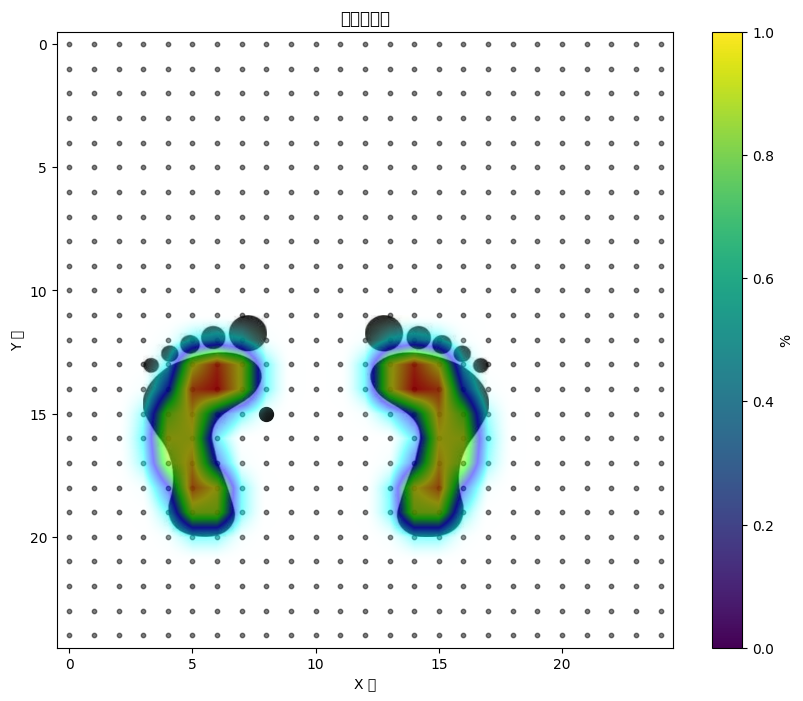

In [40]:
import numpy as np
from itertools import chain
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from scipy.ndimage import gaussian_filter
import random
import matplotlib.image as mpimg

# 左侧鞋垫传感器压力值，frontend是前脚掌传感器，backend是后脚掌传感器，center是中间脚掌传感器
left_pressures_data = {
    "frontend": [127, 129, 128, 127, 127, 128],
    "center": [110, 100, 100, 97, 107, 109],
    "backend": [126, 125, 120, 120],
}
# 右侧鞋垫传感器压力值
right_pressures_data = {'frontend': [127, 129, 128, 127, 127, 128], 'center': [110, 100, 100, 97, 107, 109], 'backend': [126, 125, 120, 120]}
# 左侧鞋垫传感器坐标,sensor,frontend_xy是前脚掌传感器，backend_xy是后脚掌传感器，center_xy是中间脚掌传感器
left_xy={
    
    'rectangle_left_top_xy':[2,15], # 鞋垫所在矩形的左上角坐标
    'rectangle_width_hight':[10,5],
    'sensor':{
        "frontend_xy":[],
        "center_xy":[],
        "backend_xy":[]
    },
    'map_rule':lambda x,y: (x,y)
}
# 右侧鞋垫传感器坐标
right_xy = {
    "rectangle_left_top_xy": [10,15],  # 鞋垫所在矩形的左上角坐标
    "rectangle_width_hight": [10, 5],
    'sensor':{
        "frontend_xy":[],
        "center_xy":[],
        "backend_xy":[]
    },
    "map_rule": lambda x, y: (x, y),
}
# 根据映射规则通过鞋垫所在矩形的左上角坐标和宽高计算传感器坐标
left_map_rule(left_xy['rectangle_left_top_xy'],left_xy['rectangle_width_hight'],left_xy)
# 根据映射规则通过鞋垫所在矩形的左上角坐标和宽高计算传感器坐标
right_map_rule(right_xy["rectangle_left_top_xy"],left_xy['rectangle_width_hight'],right_xy)


print(left_pressures_data)

# 将左侧传感器压力整合到一个list中
left_pressures = list(chain.from_iterable(left_pressures_data.values()))
# 将右侧传感器压力整合到一个list中
right_pressures= list(chain.from_iterable(right_pressures_data.values()))
# 将左侧传感器压力和右侧传感器压力整合到一起
total_pressure=  list(chain.from_iterable([left_pressures,right_pressures]))

# 整合左侧传感器和右侧传感器坐标
left_sensor_xy=list(chain.from_iterable([left_xy['sensor']['frontend_xy'],left_xy['sensor']['center_xy'],left_xy['sensor']['backend_xy']]))
right_sensor_xy=list(chain.from_iterable([right_xy['sensor']['frontend_xy'],right_xy['sensor']['center_xy'],right_xy['sensor']['backend_xy']]))
total_sensor_xy=list(chain.from_iterable([left_sensor_xy,right_sensor_xy]))

# 计算压力中心坐标
cop_xy=calculate_cop_xy(pressures=total_pressure,coordinates=total_sensor_xy)
# 计算每个传感器到压力中心的距离
sensor_distance=calculate_distances(sensor_coords=total_sensor_xy, center_coords=cop_xy)
# 计算压力中心的数值
F_COP=calculate_F_COP(pressures=total_pressure, distances=sensor_distance)


"""
以下是绘制热力图的代码
"""
cop_xy_int=np.array(cop_xy).astype(int)


max_pressure = np.max(total_pressure)
normalized_pressure = (total_pressure / max_pressure)+2


# 自定义颜色映射
colors = [
    (1.0, 1.0, 1.0, 0.0),  # 白色
    (0.0, 1.0, 1.0, 1.0),  # 青色
    (0.0, 0.0, 1.0, 1.0),  # 蓝色
    (0.0, 1.0, 0.0, 1.0),  # 绿色
    (1.0, 1.0, 0.0, 1.0),  # 黄色
    (1.0, 0.0, 0.0, 1.0)   # 红色 
    ]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)

figure_data=np.zeros(shape=(25, 25))
for (x, y), pressure in zip(total_sensor_xy, total_pressure):
    figure_data[x,y]=pressure

figure_data[cop_xy_int[0],cop_xy_int[1]] = np.floor(F_COP)/max_pressure

smoothed_data = gaussian_filter(figure_data, sigma=0.7)


max_smoothed=np.max(smoothed_data)
norma_smoothed=(smoothed_data / max_smoothed)

rotated_norma_smoothed = np.rot90(norma_smoothed)

n = norma_smoothed.shape[0]
rotated_cop_xy = (cop_xy_int[1], n - 1 - cop_xy_int[0])
# rotated_cop_xy=np.rot90(cop_xy_int)
print(norma_smoothed[cop_xy_int[0],cop_xy_int[1]])


# 创建平滑热力图
plt.figure(figsize=(10, 8))
plt.imshow(
    rotated_norma_smoothed,
    cmap=cmap,
    interpolation="bilinear",
    vmin=0,
    vmax=0.99,
    zorder=6,
    alpha=0.5,
)


# 读取图片
left = mpimg.imread("assets/left-1.png")
right = mpimg.imread("assets/right-1.png")


# 显示图片并指定显示区域
plt.imshow(left, extent=[3, 8, 20, 11],zorder=5)  # 图片显示在 (2, 8) 和 (3, 7) 的区域
plt.imshow(right, extent=[12, 17, 20, 11],zorder=5)  # 图片2显示在 (6, 9) 和 (2, 5) 的区域


plt.colorbar(label='%')
plt.title('平滑热力图')
plt.xlabel('X 轴')
plt.ylabel('Y 轴')

plt.scatter(rotated_cop_xy[0], rotated_cop_xy[1], color="black", s=100, zorder=5)

# 创建点状背景
x, y = np.meshgrid(np.arange(figure_data.shape[1]), np.arange(figure_data.shape[0]))
plt.scatter(x, y, color='black', s=10, alpha=0.5,zorder=5)

plt.show()

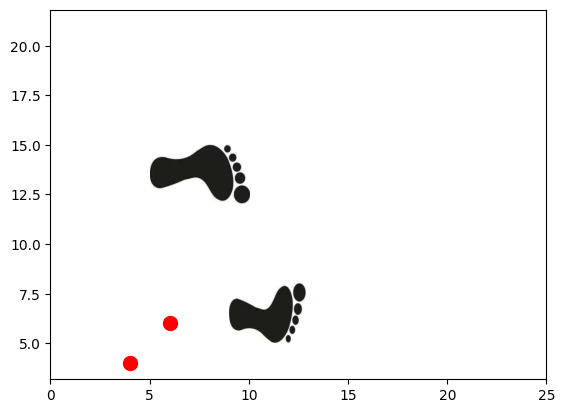

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 读取图片
left = mpimg.imread("assets/left.png")
right = mpimg.imread("assets/right.png")


# 显示图片并指定显示区域
plt.imshow(right, extent=[9, 13, 5, 8])  # 图片显示在 (2, 8) 和 (3, 7) 的区域
plt.imshow(left, extent=[5,10, 12, 15])  # 图片2显示在 (6, 9) 和 (2, 5) 的区域

# 设置坐标轴比例一致
plt.axis("equal")

# 在图片上绘制其他图形
plt.scatter([4, 6], [4, 6], color="red", s=100)  # 绘制红色点

plt.xlim(0, 25)
plt.ylim(0, 25)
plt.show()

/Users/mayphyr/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mayphyr/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21387 (\N{CJK UNIFIED IDEOGRAPH-538B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mayphyr/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21147 (\N{CJK UNIFIED IDEOGRAPH-529B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mayphyr/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mayphyr/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24515 (\N{CJK

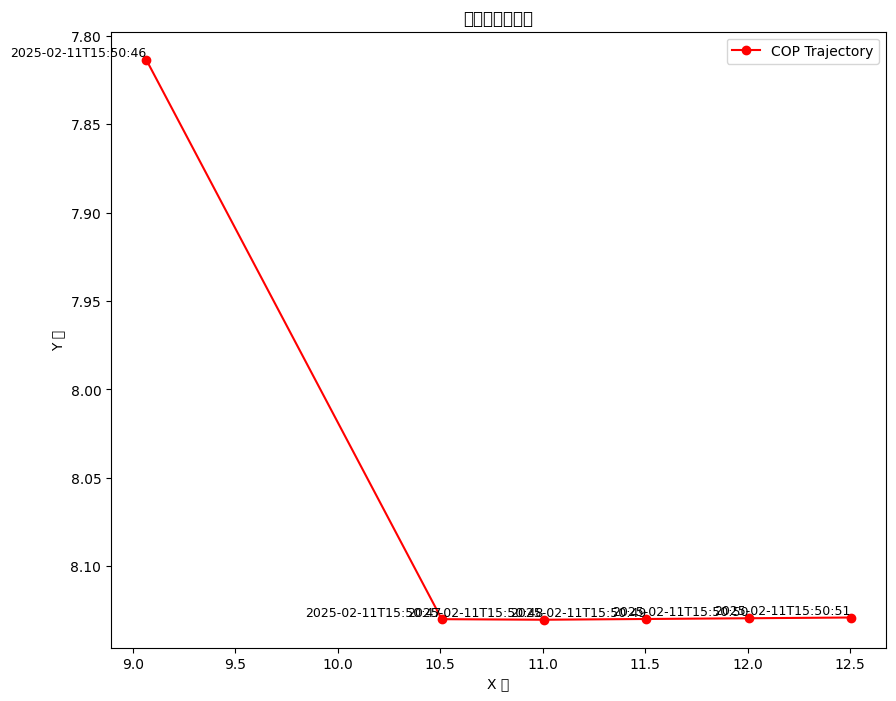

In [16]:
from cop_trajectory_analysis.data_loader import PressureDataLoader
from cop_trajectory_analysis.data_loader import CoordinateDataLoader
from itertools import chain
from cop_trajectory_analysis import cop_calculation as ca

pressure_loader = PressureDataLoader("data/pressure_data.csv")
pressure_loader.load_pressure()
total_pressure = pressure_loader.get_total_pressure()


coordinate_loader = CoordinateDataLoader(
    "data/coordinate_data.csv", ca.left_map_rule, ca.right_map_rule
)
coordinate_loader.load_coordinates()
totoal_coordinate = coordinate_loader.get_total_coordinate()
cop_xys=[
    ca.calculate_cop_xy(pressures=pressure, coordinates=coordinate)
    for coordinate, pressure in zip(totoal_coordinate.values(), total_pressure.values())
]
# 假设 timestamps 是对应的时间戳列表
timestamps = list(totoal_coordinate.keys())

# 将压力中心坐标转换为 numpy 数组以便于绘图
cop_xy_array = np.array(cop_xys)

# 绘制压力中心轨迹图
plt.figure(figsize=(10, 8))
plt.plot(
    cop_xy_array[:, 0],
    cop_xy_array[:, 1],
    marker="o",
    linestyle="-",
    color="red",
    label="COP Trajectory",
)

# 标记每个时间点
for i, (x, y) in enumerate(cop_xys):
    plt.text(x, y, timestamps[i], fontsize=9, ha="right", va="bottom")

plt.title("压力中心轨迹图")
plt.xlabel("X 轴")
plt.ylabel("Y 轴")
plt.gca().invert_yaxis()
plt.legend()
plt.show()